In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset from pickle file
import pickle
quora_data=pickle.load(open('final_data.p','rb'))

In [3]:
#Printing the top 5 rows from the dataset
quora_data.head()

,qid,question_text,target,Length,Total_Words,Total_stopwords,punctuations_count,uppercase_count,num_exclamation_marks,preprocessed_questions
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13,6,1,53,0,how quebec nationalists see province nation 1960s
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,16,8,2,63,0,do adopt dog would encourage people adopt not ...
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,10,1,2,54,0,why velocity affect time do velocity affect sp...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9,2,1,44,0,how otto von guericke use magdeburg hemispheres
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15,5,1,59,0,can i convert montra helicon d mountain bike c...


<h1>Splitting the dataset into train and test</h1>

In [4]:
from sklearn.model_selection import train_test_split
y=quora_data['target']

x_train,x_test,y_train,y_test=train_test_split(quora_data.drop('target',axis=1),y,test_size=0.33,stratify=y,random_state=42)
print("After Splitting")
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

After Splitting
(875101, 9) (875101,)
(431021, 9) (431021,)


1.There are around 0.8M data points in the training dataset with 9 features.<br>
2.There are around 0.4M data points in the testing dataset with 9 features

<h1>TFIDF Representation of text</h1>

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec=TfidfVectorizer(ngram_range=(1,3),min_df=8,max_features=15000,use_idf=True,norm='l2') #Generating trigrams
x_train_questions_tfidf=vec.fit_transform(x_train['preprocessed_questions'])
x_test_questions_tfidf=vec.transform(x_test['preprocessed_questions'])

print("Shapes After Performing Vectorization")
print(x_train_questions_tfidf.shape,y_train.shape)
print(x_test_questions_tfidf.shape,y_test.shape)

Shapes After Performing Vectorization
(875101, 15000) (875101,)
(431021, 15000) (431021,)


In [25]:
#Getting all the words which were used in 
unique_words=vec.get_feature_names()
print(unique_words)

['00', '000', '000 000', '000 years', '01', '05', '10', '10 000', '10 12', '10 15', '10 20', '10 days', '10 year', '10 year old', '10 years', '100', '100 000', '100 years', '1000', '10000', '100k', '1080p', '10k', '10th', '11', '11 12', '11 year', '110', '11th', '11th 12th', '12', '12 board', '12 cbse', '12 year', '12 year old', '12 years', '120', '125', '12th', '12th board', '12th cbse', '12th class', '12v', '13', '13 year', '13 year old', '13 years', '13 years old', '130', '14', '14 year', '14 year old', '14 years', '14 years old', '140', '14th', '15', '15 days', '15 year', '15 year old', '15 years', '15 years old', '150', '1500', '15th', '16', '16 year', '16 year old', '16 years', '16 years old', '160', '17', '17 year', '17 year old', '17 years', '17 years old', '170', '18', '18 year', '18 year old', '18 years', '18 years old', '180', '1800', '18th', '19', '19 year', '19 year old', '190', '1945', '1947', '1960', '1960s', '1970s', '1980', '1980s', '1984', '1990', '1990s', '1991', '19

In [33]:
#Finding the top 20 important words in text corpus
unique_words_dict=dict(zip(unique_words,vec.idf_))
unique_words_dict['zuckerberg']

9.57010794161786

In [34]:
unique_words_dict = [(k, unique_words_dict[k]) for k in sorted(unique_words_dict, key=unique_words_dict.get, reverse=True)]

<h1>Generating top 30 important words based on idf values</h1>

In [41]:
#Generating the top 30 important words.These are some of the rarest words
unique_words_dict[:][:30]

[('12v', 10.790275431863774),
 ('math math math', 10.770072724546257),
 ('saiyan', 10.730852011392974),
 ('theta', 10.674762544741931),
 ('welsh', 10.674762544741931),
 ('adultery', 10.656744039239253),
 ('asian men', 10.656744039239253),
 ('celsius', 10.656744039239253),
 ('charcoal', 10.656744039239253),
 ('diapers', 10.656744039239253),
 ('hdd', 10.656744039239253),
 ('vmc', 10.656744039239253),
 ('5x', 10.639044462139852),
 ('apple watch', 10.639044462139852),
 ('authentication', 10.639044462139852),
 ('blood cells', 10.639044462139852),
 ('blood type', 10.639044462139852),
 ('caption', 10.639044462139852),
 ('chemical weapons', 10.639044462139852),
 ('crane', 10.639044462139852),
 ('duel', 10.639044462139852),
 ('feb', 10.639044462139852),
 ('hallucinations', 10.639044462139852),
 ('icc', 10.639044462139852),
 ('orchestra', 10.639044462139852),
 ('payer', 10.639044462139852),
 ('pneumonia', 10.639044462139852),
 ('proposition', 10.639044462139852),
 ('rotten', 10.639044462139852),

<h1>Preparing Data Models</h1>

In [33]:
def get_num_transpose(df,feature):
    arr=np.array(df[feature].values).reshape(len(df),1)
    return arr

In [34]:
x_train_length=get_num_transpose(x_train,'Length')
x_test_length=get_num_transpose(x_test,'Length')

x_train_words=get_num_transpose(x_train,'Total_Words')
x_test_words=get_num_transpose(x_test,'Total_Words')

x_train_stop_words=get_num_transpose(x_train,'Total_stopwords')
x_test_stop_words=get_num_transpose(x_test,'Total_stopwords')

x_train_upper=get_num_transpose(x_train,'uppercase_count')
x_test_upper=get_num_transpose(x_test,'uppercase_count')


In [45]:
x_train.head()

,qid,question_text,Length,Total_Words,Total_stopwords,punctuations_count,uppercase_count,num_exclamation_marks,preprocessed_questions
552350,6c388e9b95bc18e6fc55,What's the function of polar bodies?,36,6,2,2,28,0,what function polar body
1162169,e3b6e456e8c2d6d47a72,How do I begin everything from a new start in ...,59,12,4,1,45,0,how i begin everything new start partial drop
568102,6f51deac9f2048c0f38f,How much cholesterol is too much?,33,6,2,1,26,0,how much cholesterol much
440031,563c0b590cd95bd84b8d,What are the options to deliver scripts to Ind...,61,11,4,1,48,0,what options deliver script indian cinema men
237922,2e898e1797cea7d491d3,Which insurance company in India provide healt...,72,10,2,1,60,0,which insurance company india provide health i...


In [66]:
from scipy.sparse import hstack

x_train_tfidf=hstack((x_train_questions_tfidf,x_train_length,x_train_words,x_train_stop_words,x_train_upper)).tocsr()
x_test_tfidf=hstack((x_test_questions_tfidf,x_test_length,x_test_words,x_test_stop_words,x_test_upper)).tocsr()

print(x_train_tfidf.shape,y_train.shape)
print(x_test_tfidf.shape,y_test.shape)

(875101, 15004) (875101,)
(431021, 15004) (431021,)


<h1>Naive Bayes</h1>

<h1>Hyperparameter Tuning using GridSearchV </h1>

In [84]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
model=MultinomialNB(fit_prior=True,class_prior=[0.5,0.5])
clf=GridSearchCV(model,param_grid=parameters,cv=3,verbose=10,n_jobs=-1,scoring='f1')
clf.fit(x_train_tfidf,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  20 out of  24 | elapsed:   24.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   26.4s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=[0.5, 0.5], fit_prior=True),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=10)

In [86]:
clf.best_estimator_

MultinomialNB(alpha=0.01, class_prior=[0.5, 0.5], fit_prior=True)

In [91]:
from sklearn.metrics import f1_score
model=MultinomialNB(alpha=0.01, class_prior=[0.5, 0.5], fit_prior=True)
model.fit(x_train_tfidf,y_train)

train_pred=model.predict(x_train_tfidf)
test_pred=model.predict(x_test_tfidf)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

0.4127374823739476 0.40442526000951673


In [106]:
print("Train F1 score : {}".format(train_f1_score))
print("Test F1 score : {}".format(test_f1_score))

Train F1 score : 0.4127374823739476
Test F1 score : 0.40442526000951673


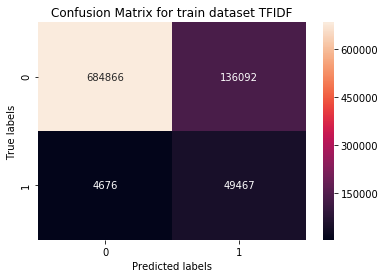

In [94]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_train_tfidf=confusion_matrix(y_train,train_pred)
ax= plt.subplot()
sns.heatmap(cm_train_tfidf, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

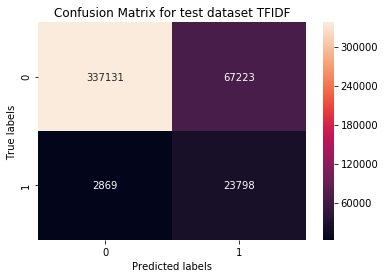

In [93]:
#Test Confusion Matrix
cm_test_tfidf=confusion_matrix(y_test,test_pred)
ax= plt.subplot()
sns.heatmap(cm_test_tfidf, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for test dataset TFIDF'); 

In [95]:
#Feature Names for Tfidf
feature_names_tfidf=[]
feature_names_tfidf.extend(unique_words)
feature_names_tfidf.extend(['length'])
feature_names_tfidf.extend(['Total_Words'])
feature_names_tfidf.extend(['Total_stopwords'])
feature_names_tfidf.extend(['uppercase_count'])
print("Total Number of Features for TFIDF are {0}".format(len(feature_names_tfidf)))

Total Number of Features for TFIDF are 15004


<b>List of top 20 Features for Insincere Questions</b>

In [98]:
positive_class_tfidf=model.feature_log_prob_[1,:].argsort()
reversed_pos_class_tfidf=positive_class_tfidf[::-1]
print(np.take(feature_names_tfidf,reversed_pos_class_tfidf[:20]))

['length' 'uppercase_count' 'Total_Words' 'Total_stopwords' 'why' 'be'
 'people' 'not' 'do' 'trump' 'women' 'men' 'like' 'white' 'muslims' 'how'
 'black' 'think' 'americans' 'quora']


<b>List of top 20 Features for Sincere Questions</b>

In [104]:
negative_class_tfidf=model.feature_log_prob_[0,:].argsort()
reversed_neg_class_tfidf=negative_class_tfidf[::-1]
print(np.take(feature_names_tfidf,reversed_neg_class_tfidf[:20]))

['length' 'uppercase_count' 'Total_Words' 'Total_stopwords' 'what' 'how'
 'be' 'why' 'do' 'get' 'best' 'not' 'can' 'which' 'would' 'use' 'make'
 'like' 'people' 'what best']


<b>Analyzing all the False Positive Points</b>

In [118]:
#Collecting all the False Postitive Points
fp_dict={}
for i in range(0,len(x_test)):
    if y_test.iloc[i]==0 and test_pred[i]==1:
        fp_dict[i]=x_test.iloc[i]

In [120]:
#Creating DataFrame of false positive Points
fp_df=pd.DataFrame(fp_dict)
fp_df=fp_df.T
fp_df.head()

,qid,question_text,Length,Total_Words,Total_stopwords,punctuations_count,uppercase_count,num_exclamation_marks,preprocessed_questions
1,f11286729704be4edb40,What does an American speaking European Portug...,62,9,2,1,49,0,what american speak european portuguese sound ...
9,8edc7009df2f955c7807,Is it wrong to be really disgusted by people w...,97,18,9,1,78,0,be wrong really disgust people care animals hu...
17,0fae92af8c2a61c0c54a,What wast Custers Last Stand really like and t...,85,14,4,1,67,0,what wast custers last stand really like bruta...
58,15c3a2fae7bce6c4ce04,A girl having many past boyfriends and hence b...,109,20,6,2,85,0,a girl many past boyfriends hence breakups wan...
69,a91fae87fa559184618d,Why do we love the people that we can't have?,45,10,5,2,33,0,why love people not


In [124]:
from tqdm import tqdm
import nltk
comment_words=' '
#print(data_sincere.head())
for val in tqdm(fp_df['preprocessed_questions'].values): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

100%|████████████████████████████████████████████████████████████████████████████| 67223/67223 [15:43<00:00, 31.83it/s]


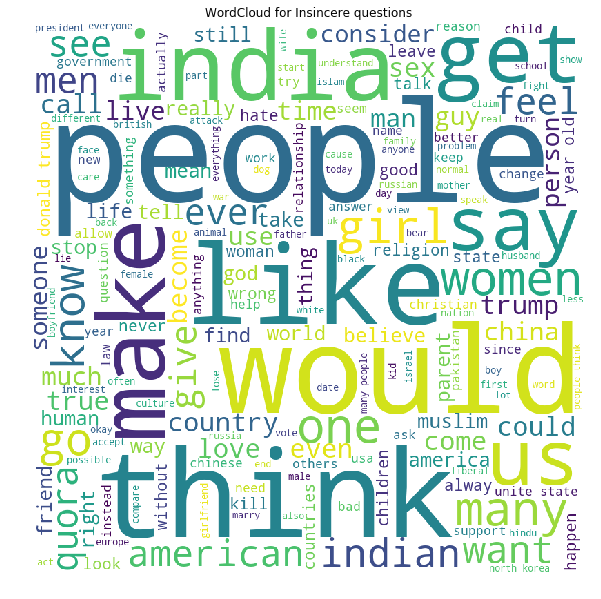

In [126]:
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("WordCloud for Insincere questions")
plt.show()

<b>Analyzing the False Negative Points</b>

In [127]:
#Collecting all the false Negative Points
fn_dict={}
for i in range(0,len(x_test)):
    if y_test.iloc[i]==1 and test_pred[i]==0:
        fn_dict[i]=x_test.iloc[i]

In [130]:
fn_df=pd.DataFrame(fn_dict)
fn_df=fn_df.T
fn_df.head()

,qid,question_text,Length,Total_Words,Total_stopwords,punctuations_count,uppercase_count,num_exclamation_marks,preprocessed_questions
141,52b00e9f6f5e38adcd86,"Who has more overrated TV programs, movies, mu...",121,18,6,4,93,0,who overrate tv program movies music kinds ent...
533,80f72d58143cb5dc2da2,Where can I find nude pictures of an Indian wo...,50,10,3,1,37,0,where i find nude picture indian woman
790,49c386412c2ce2bba018,How can I get myself kidnapped by real live va...,53,10,3,1,41,0,how i get kidnap real live vampires
1385,a83518fe5749df31d19a,"Which is more immoral, drowning puppies or vac...",61,9,3,2,50,0,which immoral drown puppies vacuum fetuses
1564,167ddc7edef19f08c554,What are some books and resources on the polit...,94,15,8,2,77,0,what book resources politics anti semitism hol...


In [131]:
from tqdm import tqdm
import nltk
comment_words=' '
#print(data_sincere.head())
for val in tqdm(fn_df['preprocessed_questions'].values): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '


100%|███████████████████████████████████████████████████████████████████████████| 2869/2869 [00:00<00:00, 15179.62it/s]

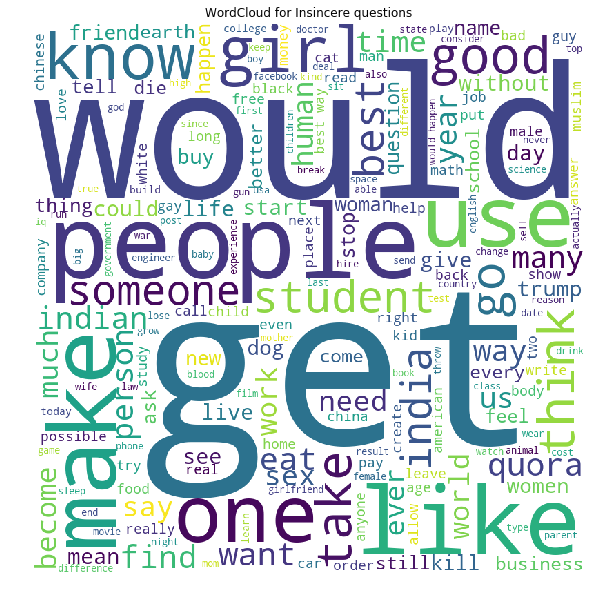

In [132]:
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("WordCloud for Insincere questions")
plt.show()

In [133]:
import pickle
pickle.dump(model,open('Naive_Bayes.p','wb'))
pickle.dump(fp_df,open('fp_df.p','wb'))
pickle.dump(fn_df,open('fn_df.p','wb'))
pickle.dump(vec,open('tfidf_vec.p','wb'))

<h1>Applying Min-Max Normalization on Numerical Features</h1>

In [5]:
from sklearn.preprocessing import Normalizer

normalizer=Normalizer()
normalizer.fit(x_train['Length'].values.reshape(-1,1))

x_train_len_norm = normalizer.transform(x_train['Length'].values.reshape(-1,1))
x_test_len_norm = normalizer.transform(x_test['Length'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_len_norm.shape, y_train.shape)
print(x_test_len_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(875101, 1) (875101,)
(431021, 1) (431021,)


In [6]:
from sklearn.preprocessing import Normalizer

normalizer=Normalizer()
normalizer.fit(x_train['Total_Words'].values.reshape(-1,1))

x_train_words_norm = normalizer.transform(x_train['Total_Words'].values.reshape(-1,1))
x_test_words_norm = normalizer.transform(x_test['Total_Words'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_words_norm.shape, y_train.shape)
print(x_test_words_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(875101, 1) (875101,)
(431021, 1) (431021,)


In [7]:
from sklearn.preprocessing import Normalizer

normalizer=Normalizer()
normalizer.fit(x_train['Total_stopwords'].values.reshape(-1,1))

x_train_stopwords_norm = normalizer.transform(x_train['Total_stopwords'].values.reshape(-1,1))
x_test_stopwords_norm = normalizer.transform(x_test['Total_stopwords'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_stopwords_norm.shape, y_train.shape)
print(x_test_stopwords_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(875101, 1) (875101,)
(431021, 1) (431021,)


In [8]:
from sklearn.preprocessing import Normalizer

normalizer=Normalizer()
normalizer.fit(x_train['uppercase_count'].values.reshape(-1,1))

x_train_upper_norm = normalizer.transform(x_train['uppercase_count'].values.reshape(-1,1))
x_test_upper_norm = normalizer.transform(x_test['uppercase_count'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_upper_norm.shape, y_train.shape)
print(x_test_upper_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(875101, 1) (875101,)
(431021, 1) (431021,)


<h1>Preparing Data Models</h1>

In [139]:
from scipy.sparse import hstack

x_train_tfidf_lr=hstack((x_train_questions_tfidf,x_train_len_norm,x_train_words_norm,x_train_stopwords_norm,x_train_upper_norm)).tocsr()
x_test_tfidf_lr=hstack((x_test_questions_tfidf,x_test_len_norm,x_test_words_norm,x_test_stopwords_norm,x_test_upper_norm)).tocsr()

print(x_train_tfidf_lr.shape,y_train.shape)
print(x_test_tfidf_lr.shape,y_test.shape)

(875101, 15004) (875101,)
(431021, 15004) (431021,)


<h1>Logistic Regression</h1>

<b>HyperParameter tuning on GridSearchCv</b>

In [143]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

alpha=[10**(-4),10**(-3),10**(-2),10**(-1),1,10,100,1000,10000]
model=SGDClassifier(loss='log',penalty='l1',fit_intercept=True,class_weight='balanced')
clf=GridSearchCV(model,param_grid=parameters,cv=3,verbose=10,n_jobs=-1,scoring='f1')
clf.fit(x_train_tfidf_lr,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done  20 out of  24 | elapsed:   46.6s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   49.7s finished
C:\Users\om\Anaconda31\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=10)

In [145]:
clf.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [146]:
from sklearn.metrics import f1_score
model_lr=SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

model_lr.fit(x_train_tfidf_lr,y_train)

train_pred=model_lr.predict(x_train_tfidf_lr)
test_pred=model_lr.predict(x_test_tfidf_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.42576701539908307 0.4237272971280308


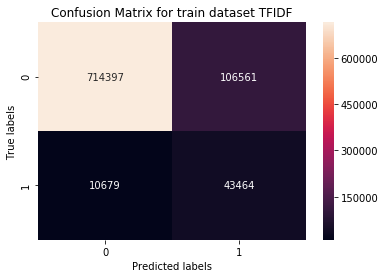

In [165]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_train_tfidf_lr=confusion_matrix(y_train,train_pred)
ax= plt.subplot()
sns.heatmap(cm_train_tfidf_lr, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

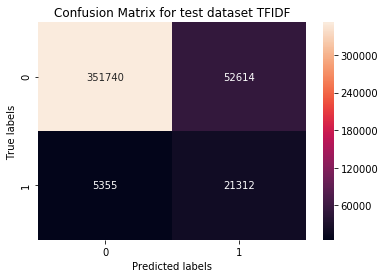

In [166]:
cm_test_tfidf_lr=confusion_matrix(y_test,test_pred)
ax= plt.subplot()
sns.heatmap(cm_test_tfidf_lr, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for test dataset TFIDF'); 

In [170]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred,target_names=['Sincere','Insincere']))

             precision    recall  f1-score   support

    Sincere       0.99      0.87      0.92    404354
  Insincere       0.29      0.80      0.42     26667

avg / total       0.94      0.87      0.89    431021



In [167]:
import pickle
pickle.dump(model_lr,open('lr.p','wb'))
pickle.dump(x_train_tfidf_lr,open('train_data_model.p','wb'))
pickle.dump(x_train_tfidf_lr,open('test_data_model.p','wb'))

<h1>Feature Engineering</h1>

<b>1. Computing Sentiment Scores</b>

In [177]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [184]:
def get_Sentiment_Score(df):
    neutral_values=[]
    pos_values=[]
    neg_values=[]
    comp_values=[]
    for question in tqdm(df['question_text'].values):
        ss=sid.polarity_scores(question)
        neutral_values.append(ss['neu'])
        neg_values.append(ss['neg'])
        pos_values.append(ss['pos'])
        comp_values.append(ss['compound'])
    return neutral_values,pos_values,neg_values,comp_values

In [ ]:
neu_train,neg_train,pos_train,comp_train=get_Sentiment_Score(x_train)

In [ ]:
neu_test,neg_test,pos_test,comp_test=get_Sentiment_Score(x_test)

In [187]:
#Adding Sentiment Features in train and test Dataset
x_train['neu_score']=neu_train
x_train['neg_score']=neg_train
x_train['pos_score']=pos_train
x_train['comp_score']=comp_train

x_test['neu_score']=neu_test
x_test['neg_score']=neg_test
x_test['pos_score']=pos_test
x_test['comp_score']=comp_test

<b>2. Number of Unique Words in Question</b>

In [9]:
#Number of Unique Words in Question
x_train['num_unique_words'] = x_train['question_text'].apply(
    lambda question: len(set(w for w in question.split())))

x_test['num_unique_words'] = x_test['question_text'].apply(
    lambda question: len(set(w for w in question.split())))

<b>3. Proportion of Unique Words in Question</b>

In [10]:
#Proportion of Number of Unique Words
x_train['words_vs_unique'] = x_train['num_unique_words'] / x_train['Total_Words']
x_test['words_vs_unique'] = x_test['num_unique_words'] / x_test['Total_Words']

In [11]:
x_train.head()

,qid,question_text,Length,Total_Words,Total_stopwords,punctuations_count,uppercase_count,num_exclamation_marks,preprocessed_questions,num_unique_words,words_vs_unique
552350,6c388e9b95bc18e6fc55,What's the function of polar bodies?,36,6,2,2,28,0,what function polar body,6,1.000000
1162169,e3b6e456e8c2d6d47a72,How do I begin everything from a new start in ...,59,12,4,1,45,0,how i begin everything new start partial drop,12,1.000000
568102,6f51deac9f2048c0f38f,How much cholesterol is too much?,33,6,2,1,26,0,how much cholesterol much,6,1.000000
440031,563c0b590cd95bd84b8d,What are the options to deliver scripts to Ind...,61,11,4,1,48,0,what options deliver script indian cinema men,10,0.909091
237922,2e898e1797cea7d491d3,Which insurance company in India provide healt...,72,10,2,1,60,0,which insurance company india provide health i...,9,0.900000


In [197]:
import pickle
pickle.dump(x_train,open('train_feature_df.p','wb'))
pickle.dump(x_test,open('test_feature_df.p','wb'))

In [7]:
import pickle
x_train=pickle.load(open('train_feature_df.p','rb'))
x_test=pickle.load(open('test_feature_df.p','rb'))

In [8]:
x_test.head()

,qid,question_text,Length,Total_Words,Total_stopwords,punctuations_count,uppercase_count,num_exclamation_marks,preprocessed_questions,neu_score,neg_score,pos_score,comp_score,num_unique_words,words_vs_unique
133034,1a098906c77b819398af,What are some of the most political regions of...,57,11,7,1,45,0,what political regions world,1.000,0.000,0.000,0.0000,9,0.818182
1230195,f11286729704be4edb40,What does an American speaking European Portug...,62,9,2,1,49,0,what american speak european portuguese sound ...,0.762,0.238,0.000,0.3612,9,1.000000
1259669,f6db6f61b2a2cf4d5218,Can someone share your experience studying on ...,73,10,3,1,62,0,can someone share experience study university ...,0.576,0.158,0.266,-0.3612,10,1.000000
383601,4b2d02591387b9a86141,Is class rank 41 out of 154 students a good cl...,55,12,3,1,37,0,be class rank 41 154 students good class rank,0.775,0.225,0.000,0.4404,11,0.916667
884350,ad4449d8dbe879788798,What would combine well with sunblush tomatoes?,47,7,1,1,39,0,what would combine well sunblush tomatoes,0.741,0.259,0.000,0.2732,7,1.000000


<b>Bad Words Count for each Question</b>

In [12]:
#Reading text file which contains the list of bad words provided by Google
bad_words = pd.read_csv('words_bad.txt', sep=",", header=None)
words=bad_words.columns

In [13]:
bad_words_arr=bad_words.iloc[0].tolist()

In [14]:
final_bad_words=[]
for word in bad_words_arr:
    word=word.strip() #Removing extra spaces from the words
    final_bad_words.append(word)

In [15]:
def count_bad_words(question):
    count=0;
    for word in question.split(" "):
        if word in final_bad_words:
            #print(word)
            count=count+1
    return count

In [17]:
x_train['bad_words_count']=x_train['question_text'].apply(lambda ques:count_bad_words(ques))

In [18]:
x_test['bad_words_count']=x_test['question_text'].apply(lambda ques:count_bad_words(ques))

<b>Generating ratio of bad words for each the question</b>

In [19]:
x_train['bad_word_count_ratio']=x_train['bad_words_count']/x_train['Total_Words']
x_test['bad_word_count_ratio']=x_test['bad_words_count']/x_test['Total_Words']

In [20]:
pickle.dump(x_train,open('train_feature_df.p','wb'))
pickle.dump(x_test,open('test_feature_df.p','wb'))

In [21]:
x_train=pickle.load(open('train_feature_df.p','rb'))
x_test=pickle.load(open('test_feature_df.p','rb'))

In [22]:
x_train.head()

,qid,question_text,Length,Total_Words,Total_stopwords,punctuations_count,uppercase_count,num_exclamation_marks,preprocessed_questions,num_unique_words,words_vs_unique,bad_words_count,bad_word_count_ratio
552350,6c388e9b95bc18e6fc55,What's the function of polar bodies?,36,6,2,2,28,0,what function polar body,6,1.000000,0,0.0
1162169,e3b6e456e8c2d6d47a72,How do I begin everything from a new start in ...,59,12,4,1,45,0,how i begin everything new start partial drop,12,1.000000,0,0.0
568102,6f51deac9f2048c0f38f,How much cholesterol is too much?,33,6,2,1,26,0,how much cholesterol much,6,1.000000,0,0.0
440031,563c0b590cd95bd84b8d,What are the options to deliver scripts to Ind...,61,11,4,1,48,0,what options deliver script indian cinema men,10,0.909091,0,0.0
237922,2e898e1797cea7d491d3,Which insurance company in India provide healt...,72,10,2,1,60,0,which insurance company india provide health i...,9,0.900000,0,0.0


In [23]:
#Preparing y_train
y_train=[quora_data.iloc[x]['target'] for x in x_train.index]

In [24]:
#Preparing y_test
y_test=[quora_data.iloc[x]['target'] for x in x_test.index]

In [25]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [26]:
pickle.dump(y_train,open('train_labels.p','wb'))
pickle.dump(y_test,open('test_labels.p','wb'))

In [28]:
from sklearn.preprocessing import Normalizer

normalizer=Normalizer()
normalizer.fit(x_train['bad_words_count'].values.reshape(-1,1))

x_train_bad_word_norm = normalizer.transform(x_train['bad_words_count'].values.reshape(-1,1))
x_test_bad_word_norm = normalizer.transform(x_test['bad_words_count'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_bad_word_norm.shape, y_train.shape)
print(x_test_bad_word_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(875101, 1) (875101, 1)
(431021, 1) (431021, 1)


In [29]:
from sklearn.preprocessing import Normalizer

normalizer=Normalizer()
normalizer.fit(x_train['num_unique_words'].values.reshape(-1,1))

x_train_unique_norm = normalizer.transform(x_train['num_unique_words'].values.reshape(-1,1))
x_test_unique_norm = normalizer.transform(x_test['num_unique_words'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_unique_norm.shape, y_train.shape)
print(x_test_unique_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(875101, 1) (875101, 1)
(431021, 1) (431021, 1)


<b>TFIDF Representation with 4-grams and 30k features</b>

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec=TfidfVectorizer(ngram_range=(1,4),min_df=8,max_features=30000,use_idf=True,norm='l2') #Generating trigrams
x_train_questions_tfidf=vec.fit_transform(x_train['preprocessed_questions'])
x_test_questions_tfidf=vec.transform(x_test['preprocessed_questions'])

print("Shapes After Performing Vectorization")
print(x_train_questions_tfidf.shape,y_train.shape)
print(x_test_questions_tfidf.shape,y_test.shape)

Shapes After Performing Vectorization
(875101, 30000) (875101, 1)
(431021, 30000) (431021, 1)


In [52]:
import pickle
pickle.dump(vec,open('tfidf_vec.p','wb'))

In [ ]:
vec=pickle.load(open('tfidf_best_vec.p','rb'))
x_train_questions_tfidf=vec.fit_transform(x_train['preprocessed_questions'])
x_test_questions_tfidf=vec.transform(x_test['preprocessed_questions'])

In [32]:
x_train.head()

,qid,question_text,Length,Total_Words,Total_stopwords,punctuations_count,uppercase_count,num_exclamation_marks,preprocessed_questions,num_unique_words,words_vs_unique,bad_words_count,bad_word_count_ratio
552350,6c388e9b95bc18e6fc55,What's the function of polar bodies?,36,6,2,2,28,0,what function polar body,6,1.000000,0,0.0
1162169,e3b6e456e8c2d6d47a72,How do I begin everything from a new start in ...,59,12,4,1,45,0,how i begin everything new start partial drop,12,1.000000,0,0.0
568102,6f51deac9f2048c0f38f,How much cholesterol is too much?,33,6,2,1,26,0,how much cholesterol much,6,1.000000,0,0.0
440031,563c0b590cd95bd84b8d,What are the options to deliver scripts to Ind...,61,11,4,1,48,0,what options deliver script indian cinema men,10,0.909091,0,0.0
237922,2e898e1797cea7d491d3,Which insurance company in India provide healt...,72,10,2,1,60,0,which insurance company india provide health i...,9,0.900000,0,0.0


In [36]:


x_train_punc_count=get_num_transpose(x_train,'punctuations_count')
x_test_punc_count=get_num_transpose(x_test,'punctuations_count')

x_train_bad_count_ratio=get_num_transpose(x_train,'bad_word_count_ratio')
x_test_bad_count_ratio=get_num_transpose(x_test,'bad_word_count_ratio')

x_train_words_vs_unique=get_num_transpose(x_train,'words_vs_unique')
x_test_words_vs_unique=get_num_transpose(x_test,'words_vs_unique')


In [38]:
y_train.columns=['Target']
y_test.columns=['Target']

<b>Preparing Data Models</b>

In [37]:
from scipy.sparse import hstack

x_train_tfidf_lr=hstack((x_train_questions_tfidf,x_train_len_norm,x_train_words_norm,x_train_stopwords_norm,x_train_upper_norm,x_train_bad_count_ratio,x_train_words_vs_unique,x_train_punc_count,x_train_unique_norm,x_train_bad_word_norm)).tocsr()
x_test_tfidf_lr=hstack((x_test_questions_tfidf,x_test_len_norm,x_test_words_norm,x_test_stopwords_norm,x_test_upper_norm,x_test_bad_count_ratio,x_test_words_vs_unique,x_test_punc_count,x_test_unique_norm,x_test_bad_word_norm)).tocsr()

print(x_train_tfidf_lr.shape,y_train.shape)
print(x_test_tfidf_lr.shape,y_test.shape)

(875101, 30009) (875101, 1)
(431021, 30009) (431021, 1)


In [26]:
pickle.dump(x_train_tfidf_lr,open('best_till_now_data_model_train','wb'))
pickle.dump(x_test_tfidf_lr,open('best_till_now_data_model_test','wb'))

In [2]:
import pickle
x_train_tfidf_lr=pickle.load(open('best_till_now_data_model_train','rb'))
x_test_tfidf_lr=pickle.load(open('best_till_now_data_model_test','rb'))

y_train=pickle.load(open('y_train.p','rb'))
y_test=pickle.load(open('y_test.p','rb'))

<b>Applying Logistic Regression</b>

In [194]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

parameters={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}
model=SGDClassifier(loss='log',penalty='l2',class_weight='balanced',fit_intercept=True)
clf_grid=GridSearchCV(model,param_grid=parameters,cv=3,verbose=10,n_jobs=-1,scoring='f1')
clf_grid.fit(x_train_tfidf_lr,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   47.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   53.9s finished
C:\Users\om\Anaconda31\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

GridSearchCV(cv=3, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=10)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


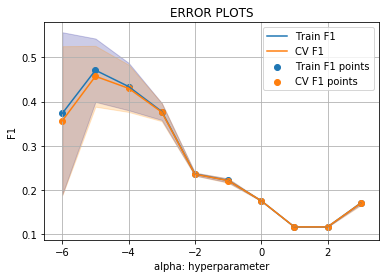

In [195]:
train_f1= clf_grid.cv_results_['mean_train_score']
train_f1_std= clf_grid.cv_results_['std_train_score']
cv_f1 = clf_grid.cv_results_['mean_test_score'] 
cv_f1_std= clf_grid.cv_results_['std_test_score']

plt.plot(np.log10(parameters['alpha']), train_f1, label='Train F1')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(parameters['alpha']),train_f1 - train_f1_std,train_f1 + train_f1_std,alpha=0.2,color='darkblue')

plt.plot(np.log10(parameters['alpha']), cv_f1, label='CV F1')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(parameters['alpha']),cv_f1 - cv_f1_std,cv_f1 + cv_f1_std,alpha=0.2,color='darkorange')

plt.scatter(np.log10(parameters['alpha']), train_f1, label='Train F1 points')
plt.scatter(np.log10(parameters['alpha']), cv_f1, label='CV F1 points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("F1")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [196]:
print(clf_grid.best_params_)

{'alpha': 1e-05}


In [197]:
print(clf_grid.best_score_)

0.4571274580730685


In [198]:
clf_grid.best_estimator_

SGDClassifier(alpha=1e-05, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [58]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [39]:
#Using predict method of sklearn
best_alpha=10**(-5)
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier
model_lr_f=SGDClassifier(alpha=0.00001,class_weight='balanced',average=False,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
model_lr_f.fit(x_train_tfidf_lr,y_train)

y_train_pred=model_lr_f.predict_proba(x_train_tfidf_lr)[:,1]
y_test_pred=model_lr_f.predict_proba(x_test_tfidf_lr)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

train_pred=model_lr_f.predict(x_train_tfidf_lr)
test_pred=model_lr_f.predict(x_test_tfidf_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.547535955088694 0.5307250741071848


In [41]:
pickle.dump(model_lr_f,open('model_lr_f_best.p','wb'))

In [253]:
y_train_pred

array([5.23630017e-14, 5.08234133e-08, 2.45798800e-08, ...,
       1.00000000e+00, 9.99885200e-01, 1.58586817e-05])

In [63]:
y_predict_train=predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
y_train_lst=y_train['Target'].tolist()
y_test_lst=y_test['Target'].tolist()

the maximum value of tpr*(1-fpr) 0.780992795892265 for threshold 0.57


In [61]:
def predict_test(proba,val):
    
    #t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    #print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=val:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [49]:
y_predict_test=predict_test(y_test_pred)
test=f1_score(y_test_lst,y_predict_test)
train=f1_score(y_train_lst,y_predict_train)
train

0.4986980868411263

In [42]:
print("Train F1-Score using 30k Features with 4grams {0}".format(train_f1_score))
print("Test F1-Score using 30k Features with 4grams {0}".format(test_f1_score))

Train F1-Score using 30k Features with 4grams 0.547535955088694
Test F1-Score using 30k Features with 4grams 0.5307250741071848


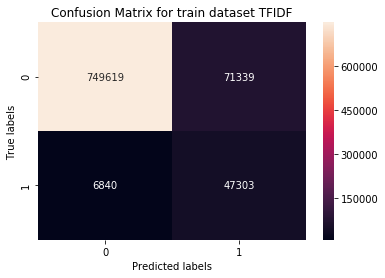

In [43]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_train_tfidf_lr=confusion_matrix(y_train,train_pred)
ax= plt.subplot()
sns.heatmap(cm_train_tfidf_lr, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

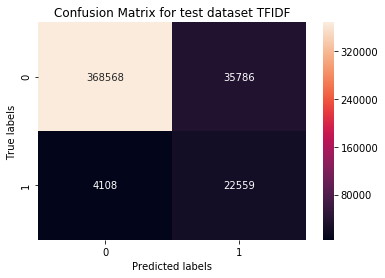

In [44]:
cm_test_tfidf_lr=confusion_matrix(y_test,test_pred)
ax= plt.subplot()
sns.heatmap(cm_test_tfidf_lr, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for test dataset TFIDF'); 

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

             precision    recall  f1-score   support

          0       0.99      0.91      0.95    404354
          1       0.39      0.85      0.53     26667

avg / total       0.95      0.91      0.92    431021



Precision for Class 1 has improved as compared to previous Models.

In [46]:
#Using predict method of sklearn
best_alpha=10**0
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier
model_lr_f=SGDClassifier(alpha=0.00001,class_weight='balanced',average=False,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
model_lr_f.fit(x_train_tfidf_lr,y_train)

y_train_pred=model_lr_f.predict_proba(x_train_tfidf_lr)[:,1]
y_test_pred=model_lr_f.predict_proba(x_test_tfidf_lr)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

train_pred=model_lr_f.predict(x_train_tfidf_lr)
test_pred=model_lr_f.predict(x_test_tfidf_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4276648210657198 0.41832689571051024


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

             precision    recall  f1-score   support

          0       0.99      0.84      0.91    404354
          1       0.27      0.93      0.42     26667

avg / total       0.95      0.84      0.88    431021



In [51]:
pickle.dump(model_lr_f,open('model_lr_1.p','wb'))

<b>Feature Importances</b>

In [160]:
#Collecting all the features(i.e 30k text features generated using TF-IDF and other 9 features)
features_lr=[]
features_lr.extend(vec.get_feature_names())
features_lr.extend(['Length'])
features_lr.extend(['Total_Word'])
features_lr.extend(['Total_stopwords'])
features_lr.extend(['Uppercase_Count'])
features_lr.extend(['bad_words_ratio'])
features_lr.extend(['unique_words_ratio'])
features_lr.extend(['Punctuation_Count'])
features_lr.extend(['Unique_Words'])
features_lr.extend(['bad_words_count'])

In [161]:
print("Total Features Considered While training the Model {}".format(len(features_lr)))

Total Features Considered While training the Model 30009


In [97]:
features_dict=dict(zip(features_lr,np.array(model_lr_f.coef_).T))
sorted_dict = [(k, features_dict[k]) for k in sorted(features_dict, key=features_dict.get, reverse=True)]
sorted_dict=dict(sorted_dict)
top20_f=list(sorted_dict.keys())
print("List of top 20 important features that model Detected")
print("="*120)
print(top20_f[0:30])

List of top 20 important features that model Detected
['castrate', 'trump', 'liberals', 'muslims', 'indians', 'women', 'americans', 'democrats', 'jews', 'girls', 'obama', 'castration', 'atheists', 'black', 'muslim', 'gay', 'people', 'iq', 'white', 'hillary', 'fuck', 'feminists', 'christians', 'modi', 'liberal', 'jew', 'hindus', 'chinese', 'homosexual', 'sister']


Words related to religions,Caste,Politics and Sexual Content are important to detect the sincerity of the question

<h1>Applying RandomForest</h1>

<h2>HyperParameter Tuning using GridSearchCV</b>

In [102]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[1,5,10,15,20],'n_estimators':[10,50,80,100,200]}
rf=RandomForestClassifier(class_weight='balanced',bootstrap=True)
grid_clf=GridSearchCV(estimator=rf,verbose=10,param_grid=parameters,n_jobs=-1,scoring='f1',return_train_score=True)
grid_clf.fit(x_train_tfidf_lr,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 27.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 5, 10, 15, 20], 'n_estimators': [10, 50, 80, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=10)

In [103]:
grid_clf.best_params_

{'max_depth': 20, 'n_estimators': 200}

In [104]:
grid_clf.best_score_

0.4124999373689114

In [105]:
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

<h3>Applying Random Forest</h3>

In [106]:
#Using the already implemented predict() of sklearn
rf_f=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

rf_f.fit(x_train_tfidf_lr,y_train)
train_pred=rf_f.predict(x_train_tfidf_lr)
test_pred=rf_f.predict(x_test_tfidf_lr)

train_f1=f1_score(y_train,train_pred)
test_f1=f1_score(y_test,test_pred)

print(train_f1,test_f1)

0.41542941846554216 0.40725947182688954


Random Forest doesnt seem to be performing well as compared to Logistic Regression

<h1>Applying Gradient Boosted Decision Tree Model</h1>

<h2>Hyperparameter Tuning using GridSearchCV</h2>

In [121]:
import lightgbm as lgb
import xgboost as xgb
parameters={'max_depth':[1,2,4,5,8,10,14,20],'n_estimators':[10,50,100,200]}
model=xgb.XGBClassifier(random_state=42,booster='gbtree',n_jobs=-1)
grid_clf=GridSearchCV(estimator=model,verbose=10,param_grid=parameters,n_jobs=-1,scoring='f1',return_train_score=True)
grid_clf.fit(x_train_tfidf_lr,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 49.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 75.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 113.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 166.2min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 313.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 4, 5, 8, 10, 14, 20], 'n_estimators': [10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=10)

In [125]:
print(grid_clf.best_params_)

{'max_depth': 20, 'n_estimators': 200}


In [129]:
print(grid_clf.best_score_)

0.4885449632893297


In [126]:
print(grid_clf.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=20, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


<b>Applying Gradient Boosted Decision Tree</b>

<b>Applying Gradient Boosted Decision Tree Model</b>

In [127]:
#Using the already implemented predict() of sklearn
import xgboost as xgb

model_xgb=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=20, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
model_xgb.fit(x_train_tfidf_lr,y_train)

train_pred=model_xgb.predict(x_train_tfidf_lr)
test_pred=model_xgb.predict(x_test_tfidf_lr)


In [128]:
#Using the already implemented predict() of sklearn
print("Train F1 Score {0}".format(f1_score(y_train,train_pred)))
print("Test F1 Score {0}".format(f1_score(y_test,test_pred)))

Train F1 Score 0.6916363636363635
Test F1 Score 0.4997817546922741


In [131]:
#Using the manual function to predict for  finding the best threshold
y_train_pred=model_xgb.predict_proba(x_train_tfidf_lr)[:,1]
y_test_pred=model_xgb.predict_proba(x_test_tfidf_lr)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

In [132]:
y_predict_train=predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.8190779980168895 for threshold 0.092


In [135]:
#Using the manual Function for finding the best threshold
y_predict_test=predict_test(y_test_pred,0.092)
test=f1_score(y_test_lst,y_predict_test)
train=f1_score(y_train_lst,y_predict_train)
test

0.5286910075544949

In [136]:
print("Train F1 Score using manual implemenation of predict() {}".format(train))
print("Test F1 Score using manual implemenation of predict() {}".format(test))

Train F1 Score using manual implemenation of predict() 0.586281968175536
Test F1 Score using manual implemenation of predict() 0.5286910075544949


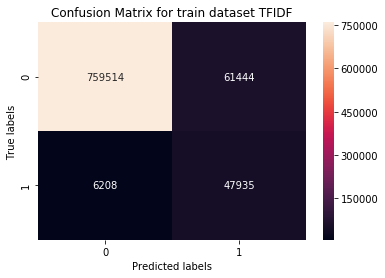

In [138]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_train_tfidf_xgb=confusion_matrix(y_train,y_predict_train)
ax= plt.subplot()
sns.heatmap(cm_train_tfidf_xgb, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

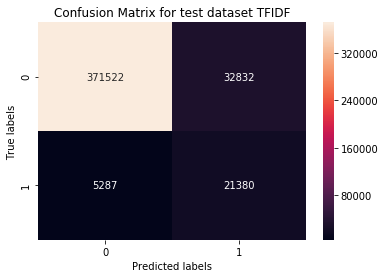

In [140]:
cm_test_tfidf_xgb=confusion_matrix(y_test,y_predict_test)
ax= plt.subplot()
sns.heatmap(cm_test_tfidf_xgb, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for test dataset TFIDF'); 

In [141]:
print(classification_report(y_test,y_predict_test))

             precision    recall  f1-score   support

          0       0.99      0.92      0.95    404354
          1       0.39      0.80      0.53     26667

avg / total       0.95      0.91      0.93    431021



In [108]:
pickle.dump(rf_f,open('rf_f.p','wb')) 

In [130]:
pickle.dump(model_xgb,open('xgb.p','wb'))

In [201]:
pickle.dump(model_lr_f,open('best_lr.p','wb'))
pickle.dump(vec,open('tfidf_best_vec.p','wb'))

In [202]:
pickle.dump(y_train,open('target_train.p','wb'))
pickle.dump(y_test,open('target_test.p','wb'))

<h3>Naive Bayes</h3>

In [143]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
model=MultinomialNB(fit_prior=True,class_prior=[0.5,0.5])
clf=GridSearchCV(model,param_grid=parameters,cv=3,verbose=10,n_jobs=-1,scoring='f1')
clf.fit(x_train_tfidf_lr,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  20 out of  24 | elapsed:   27.0s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   28.9s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=[0.5, 0.5], fit_prior=True),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=10)

In [146]:
print(clf.best_estimator_)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)


In [55]:
#using the predict() of sklearn
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
model_nb=MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)
model_nb.fit(x_train_tfidf_lr,y_train)

train_pred=model_nb.predict(x_train_tfidf_lr)
test_pred=model_nb.predict(x_test_tfidf_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.43113964686998396 0.42464459994881887


In [67]:
pickle.dump(model_nb,open('best_nb.p','wb'))

In [56]:
#Using manual predict function
#Using the manual function to predict for  finding the best threshold
y_train_pred=model_nb.predict_proba(x_train_tfidf_lr)[:,1]
y_test_pred=model_nb.predict_proba(x_test_tfidf_lr)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

In [59]:
y_predict_train=predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.780992795892265 for threshold 0.57


In [64]:
#Using the manual Function for finding the best threshold
y_predict_test=predict_test(y_test_pred,0.57)
test=f1_score(y_test_lst,y_predict_test)
train=f1_score(y_train_lst,y_predict_train)
test

0.4585090590930094

In [65]:
#Using the manual function for finding the best threshold for Naive Bayes
print("Train F1 score using the manual predict() is {}".format(train))
print("Test F1 score using the manual predict() is {}".format(test))

Train F1 score using the manual predict() is 0.4685756858874811
Test F1 score using the manual predict() is 0.4585090590930094


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred,target_names=['Sincere','Insincere']))

             precision    recall  f1-score   support

    Sincere       0.99      0.85      0.91    404354
  Insincere       0.28      0.90      0.42     26667

avg / total       0.95      0.85      0.88    431021



<b>Train Confusion Matrix</b>

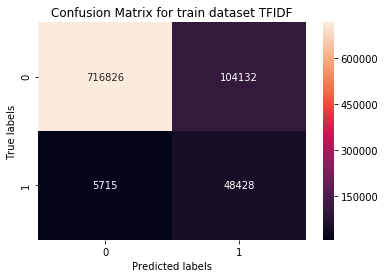

In [154]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_train_tfidf_nb=confusion_matrix(y_train,y_predict_train)
ax= plt.subplot()
sns.heatmap(cm_train_tfidf_nb, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

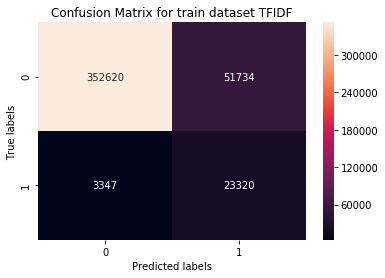

In [155]:

cm_test_tfidf_nb=confusion_matrix(y_test,y_predict_test)
ax= plt.subplot()
sns.heatmap(cm_test_tfidf_nb, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

<b>Feature Importances for Positive Class</b>

In [164]:
positive_class_tfidf=model_nb.feature_log_prob_[1,:].argsort()
reversed_pos_class_tfidf=positive_class_tfidf[::-1]
print(np.take(features_lr,reversed_pos_class_tfidf[:30]))

['Punctuation_Count' 'Unique_Words' 'Total_Word' 'Length'
 'Uppercase_Count' 'Total_stopwords' 'unique_words_ratio'
 'bad_words_count' 'why' 'be' 'people' 'not' 'do' 'trump' 'women' 'men'
 'bad_words_ratio' 'muslims' 'white' 'like' 'how' 'black' 'think'
 'americans' 'quora' 'girls' 'sex' 'indians' 'indian' 'many']


<b>Feature Importances for Negative Class</b>

In [165]:
negative_class_tfidf=model_nb.feature_log_prob_[0,:].argsort()
reversed_neg_class_tfidf=negative_class_tfidf[::-1]
print(np.take(features_lr,reversed_neg_class_tfidf[:30]))

['Punctuation_Count' 'Unique_Words' 'Total_Word' 'Length'
 'Uppercase_Count' 'Total_stopwords' 'unique_words_ratio' 'what' 'how'
 'bad_words_count' 'be' 'why' 'do' 'get' 'best' 'not' 'can' 'which'
 'would' 'use' 'make' 'like' 'people' 'what best' 'good' 'who' 'india'
 'one' 'know' 'work']


In [170]:
print(classification_report(y_test,y_predict_test))

             precision    recall  f1-score   support

          0       0.99      0.87      0.93    404354
          1       0.31      0.87      0.46     26667

avg / total       0.95      0.87      0.90    431021



In [169]:
pickle.dump(model_nb,open('model_naive.p','wb'))

In [73]:
#using the predict() of sklearn
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
model_nb=MultinomialNB(alpha=10**(-5), class_prior=[0.5, 0.5], fit_prior=True)
model_nb.fit(x_train_tfidf_lr,y_train)

train_pred=model_nb.predict(x_train_tfidf_lr)
test_pred=model_nb.predict(x_test_tfidf_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4431507852984667 0.42044765447518717


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred,target_names=['Sincere','Insincere']))

             precision    recall  f1-score   support

    Sincere       0.99      0.85      0.91    404354
  Insincere       0.28      0.87      0.42     26667

avg / total       0.95      0.85      0.88    431021



In [71]:
pickle.dump(model_nb,open('model_nb_not_best.p','wb'))

<b>Observations and Conclusions</b>

In [168]:
#After Doing Feature Engineering
from prettytable import PrettyTable

x=PrettyTable()
x.field_names=['Model','Vectorizer','HyperParameter','F1-Score']
x.add_row(['Naive Bayes','TFIDF','1',0.45])
x.add_row(['Logistic Regression','TFIDF','0.00001','0.51'])
x.add_row(['Random Forest','TFIDF',[20,200],'0.401'])
x.add_row(['GBDT','TFIDF',[20,200],'0.52'])

print(x)

+---------------------+------------+----------------+----------+
|        Model        | Vectorizer | HyperParameter | F1-Score |
+---------------------+------------+----------------+----------+
|     Naive Bayes     |   TFIDF    |       1        |   0.45   |
| Logistic Regression |   TFIDF    |    0.00001     |   0.51   |
|    Random Forest    |   TFIDF    |   [20, 200]    |  0.401   |
|         GBDT        |   TFIDF    |   [20, 200]    |   0.52   |
+---------------------+------------+----------------+----------+


1.On applying GBDT little overfitting was seen Since the difference between the train f1 score and test f1 score was large as compared to other models<br>
2.Performance of Logistic Regression and GBDT is almost equal.

<b>Using CountVectorizer</b>'

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

vec_cnt=CountVectorizer(ngram_range=(1,4),min_df=8,max_features=30000) #Generating trigrams
x_train_questions_cnt=vec_cnt.fit_transform(x_train['preprocessed_questions'])
x_test_questions_cnt=vec_cnt.transform(x_test['preprocessed_questions'])

print("Shapes After Performing Vectorization")
print(x_train_questions_cnt.shape,y_train.shape)
print(x_test_questions_cnt.shape,y_test.shape)

Shapes After Performing Vectorization
(875101, 30000) (875101, 1)
(431021, 30000) (431021, 1)


In [106]:
pickle.dump(x_train_questions_cnt,open('cv_fit.p','wb'))

In [ ]:
cv_fit=pickle.load(open('cv_fit.p','wb'))
cnt_features=tfidf_vect.get_feature_names()
cv_fit=pickle.load(open('cv_fit.p','rb'))
            count_vals=cv_fit.toarray().sum(axis=0)
            count_zip=dict(zip(cnt_features,count_vals))
            print(count_zip.keys())
            for word in word_list:
                if word in count_zip.keys():
                    data_dict[word]=count_zip[word]

In [98]:
pickle.dump(vec_cnt,open('count_vec.p','wb'))

In [99]:
from scipy.sparse import hstack

x_train_cnt_lr=hstack((x_train_questions_cnt,x_train_len_norm,x_train_words_norm,x_train_stopwords_norm,x_train_upper_norm,x_train_bad_count_ratio,x_train_words_vs_unique,x_train_punc_count,x_train_unique_norm,x_train_bad_word_norm)).tocsr()
x_test_cnt_lr=hstack((x_test_questions_cnt,x_test_len_norm,x_test_words_norm,x_test_stopwords_norm,x_test_upper_norm,x_test_bad_count_ratio,x_test_words_vs_unique,x_test_punc_count,x_test_unique_norm,x_test_bad_word_norm)).tocsr()

print(x_train_tfidf_lr.shape,y_train.shape)
print(x_test_tfidf_lr.shape,y_test.shape)

(875101, 30009) (875101, 1)
(431021, 30009) (431021, 1)


In [100]:
#using the predict() of sklearn
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
model_nb_cnt=MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)
model_nb_cnt.fit(x_train_cnt_lr,y_train)

train_pred=model_nb_cnt.predict(x_train_cnt_lr)
test_pred=model_nb_cnt.predict(x_test_cnt_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4338266086550202 0.4271668729928055


In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred,target_names=['Sincere','Insincere']))

             precision    recall  f1-score   support

    Sincere       0.99      0.85      0.91    404354
  Insincere       0.28      0.89      0.43     26667

avg / total       0.95      0.85      0.88    431021



In [102]:
pickle.dump(model_nb_cnt,open('model_nb_count_nest.p','wb'))

In [103]:
#Using predict method of sklearn
best_alpha=10**(-5)
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier
model_lr_cnt=SGDClassifier(alpha=0.00001,class_weight='balanced',average=False,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
model_lr_cnt.fit(x_train_cnt_lr,y_train)

y_train_pred=model_lr_cnt.predict_proba(x_train_cnt_lr)[:,1]
y_test_pred=model_lr_cnt.predict_proba(x_test_cnt_lr)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

train_pred=model_lr_cnt.predict(x_train_tfidf_lr)
test_pred=model_lr_cnt.predict(x_test_tfidf_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.396768175859635 0.38885341370590787


In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred,target_names=['Sincere','Insincere']))

             precision    recall  f1-score   support

    Sincere       0.95      0.99      0.97    404354
  Insincere       0.61      0.29      0.39     26667

avg / total       0.93      0.94      0.93    431021



In [105]:
pickle.dump(model_lr_cnt,open('model_lr_best_count.p','wb'))

<b>Training an SVM Classifier</b>

In [6]:
#Using predict method of sklearn
best_alpha=10**(-5)
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier
model_sv_f=SGDClassifier(alpha=0.00001,class_weight='balanced',average=False,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
model_sv_f.fit(x_train_tfidf_lr,y_train)

train_pred=model_sv_f.predict(x_train_tfidf_lr)
test_pred=model_sv_f.predict(x_test_tfidf_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.613342385731158 0.5901013577015948


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred,target_names=['Sincere','Insincere']))

             precision    recall  f1-score   support

    Sincere       0.98      0.95      0.96    404354
  Insincere       0.48      0.77      0.59     26667

avg / total       0.95      0.93      0.94    431021



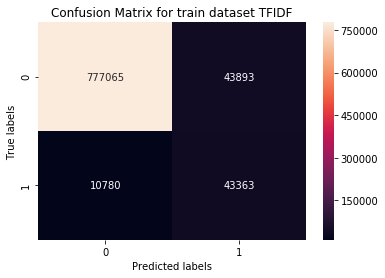

In [11]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_train_tfidf_nb=confusion_matrix(y_train,train_pred)
ax= plt.subplot()
sns.heatmap(cm_train_tfidf_nb, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

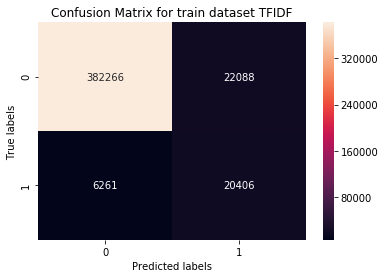

In [12]:
cm_test_tfidf_nb=confusion_matrix(y_test,test_pred)
ax= plt.subplot()
sns.heatmap(cm_test_tfidf_nb, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

In [8]:
pickle.dump(model_sv_f,open('model_sv_f.p','wb'))